In [1]:
from functools import partial

import os
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,10)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.major.width"] = 1.6
plt.rcParams["xtick.major.pad"] = 20
plt.rcParams["xtick.minor.width"] = 0.8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["xtick.minor.pad"] = 20
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.width"] = 1.6
plt.rcParams["ytick.minor.width"] = 0.8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["font.size"] = 24
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 5
plt.rcParams["savefig.dpi"] = 300/2.4
plt.rcParams["savefig.transparent"] = False
plt.rcParams["savefig.facecolor"] = "white"

from scipy import stats
from scipy import special
from scipy import optimize

os.makedirs("plots", exist_ok=True)

# Non-central $\chi^2$ distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


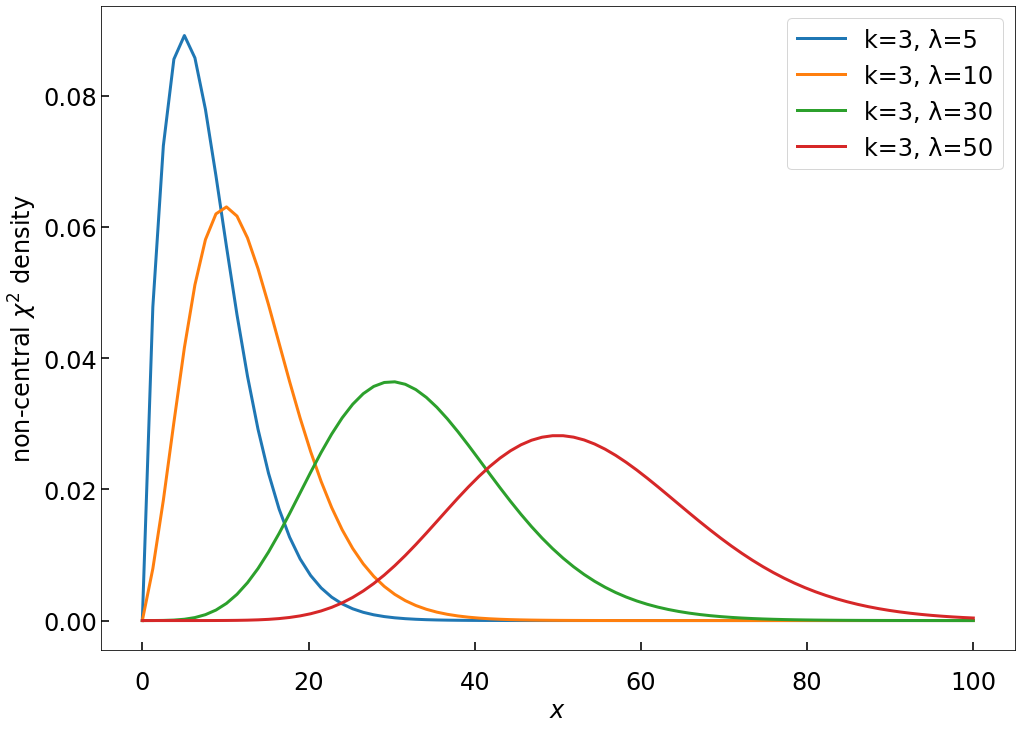

In [2]:
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=3, nc=5).pdf(np.linspace(0, 100, 80)), label="k=3, λ=5")
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=3, nc=10).pdf(np.linspace(0, 100, 80)), label="k=3, λ=10")
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=3, nc=30).pdf(np.linspace(0, 100, 80)), label="k=3, λ=30")
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=3, nc=50).pdf(np.linspace(0, 100, 80)), label="k=3, λ=50")
plt.ylabel("non-central $\chi^2$ density")
plt.xlabel("$x$")
plt.legend()

plt.savefig("plots/ncx2-of-lambda.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


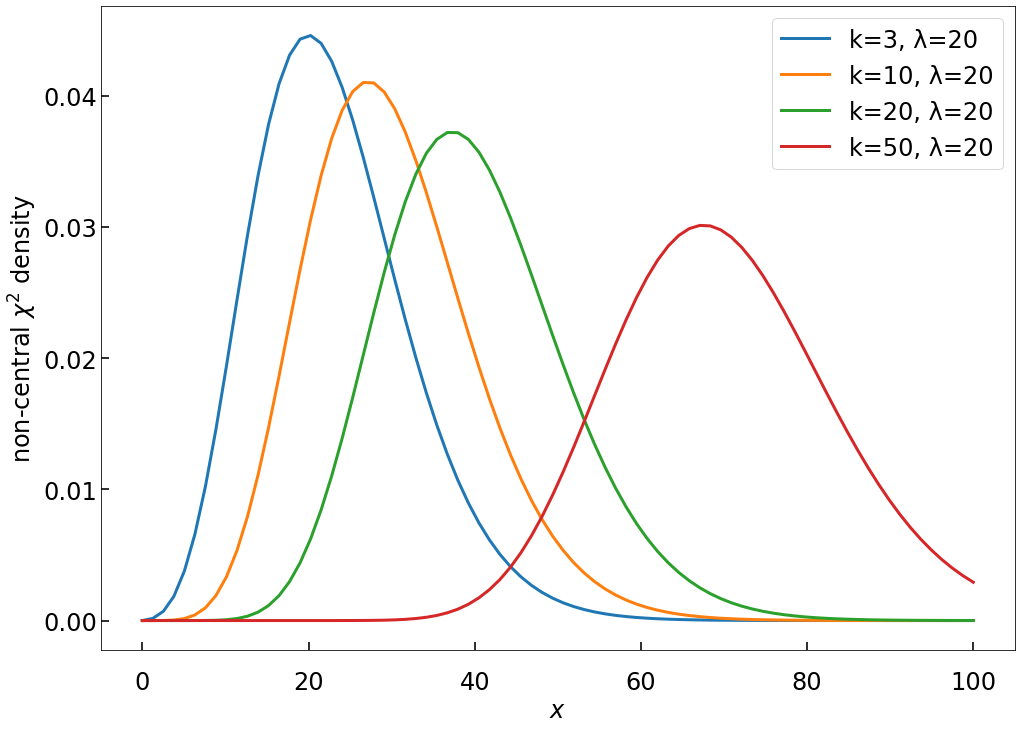

In [3]:
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=3, nc=20).pdf(np.linspace(0, 100, 80)), label="k=3, λ=20")
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=10, nc=20).pdf(np.linspace(0, 100, 80)), label="k=10, λ=20")
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=20, nc=20).pdf(np.linspace(0, 100, 80)), label="k=20, λ=20")
plt.plot(np.linspace(0, 100, 80), sp.stats.ncx2(df=50, nc=20).pdf(np.linspace(0, 100, 80)), label="k=50, λ=20")
plt.ylabel("non-central $\chi^2$ density")
plt.xlabel("$x$")
plt.legend()

plt.savefig("plots/ncx2-of-df.eps")

# Approximation of the mode of non-central $\chi^2$

In [4]:
λs = np.linspace(0, 5, 150)
dfs = [i+2 for i in range(30)]

In [5]:
@np.vectorize
def ncmax(df, l):
    """ Given number of d.o.f `df` and non-centrality `l` return the location the mode of the non-central χ2 """
    func = sp.stats.ncx2(df=df, nc=l).pdf
    return sp.optimize.differential_evolution(lambda x: -func(x), [(0, df+l+5)], tol=0.0001, maxiter=1000   ).x

Non-central χ2 has two parameters. Let's have a look at how does the mode depend on them.

Text(0.5, 0, 'non-centrality (assuming d.o.f=3)')

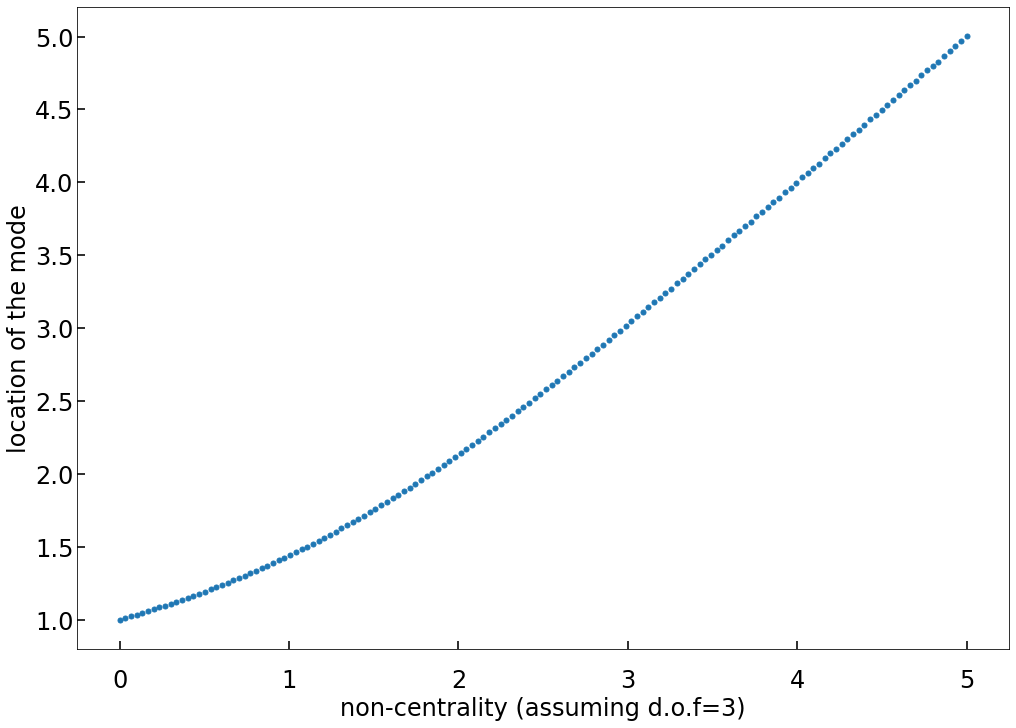

In [6]:
plt.scatter(λs, ncmax(3, λs))
plt.ylabel("location of the mode")
plt.xlabel("non-centrality (assuming d.o.f=3)")

Text(0.5, 0, 'd.o.f (assuming λ=12)')

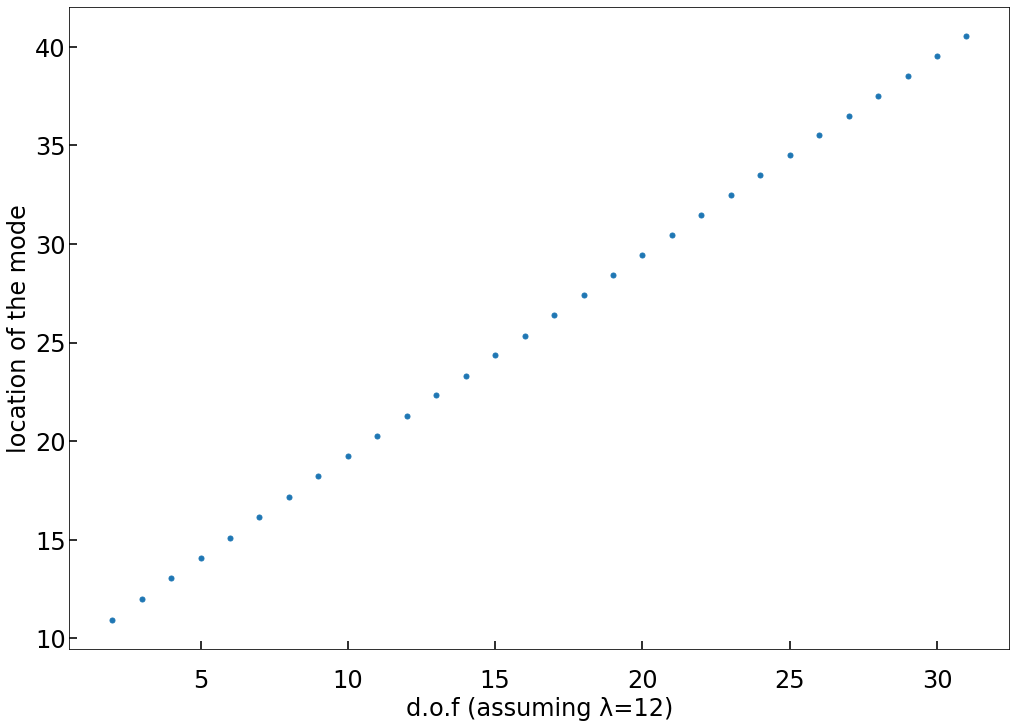

In [7]:
plt.scatter(dfs, ncmax(dfs, 12))
plt.ylabel("location of the mode")
plt.xlabel("d.o.f (assuming λ=12)")

In both cases we observe that the dependency is linear, and most of the non-linear effects saturate quickly. It turns out that the line has very simple parametric definition:

$mode(\chi^2_{df, λ}) = \lambda + df - 3$

In [8]:
def mymax(df, l):
    l = np.asarray(l)
    df = np.asarray(df)
    return l + df - 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


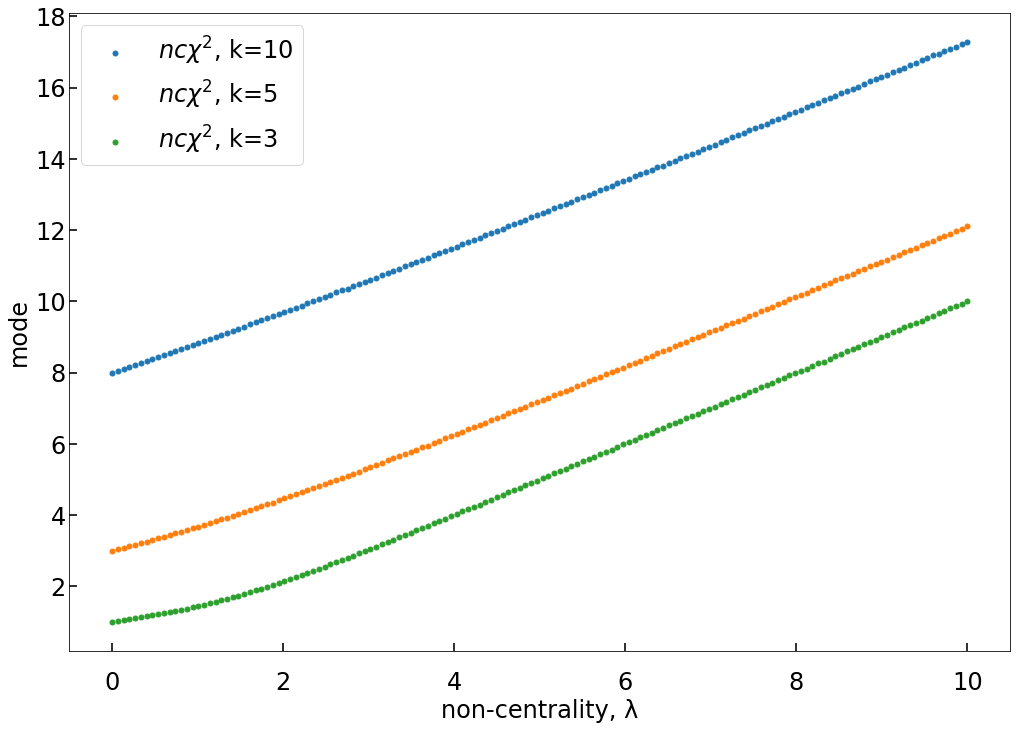

In [9]:
plt.scatter(λs*2, ncmax(10., λs*2), label="$nc\chi^2$, k=10")
#plt.plot(λs*2, mymax(10., λs*2), color="orange")
plt.scatter(λs*2, ncmax(5., λs*2), label="$nc\chi^2$, k=5")
#plt.plot(λs*2, mymax(5., λs*2), color="orange")
plt.scatter(λs*2, ncmax(3., λs*2), label="$nc\chi^2$, k=3")
#plt.plot(λs*2, mymax(3., λs*2), color="orange", label="k + λ - 3")
plt.ylabel("mode")
plt.xlabel("non-centrality, λ")
plt.legend()

plt.savefig("plots/ncx2-max.eps", dpi=300/2.4/2)

Let's see how well does it fit the truth

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


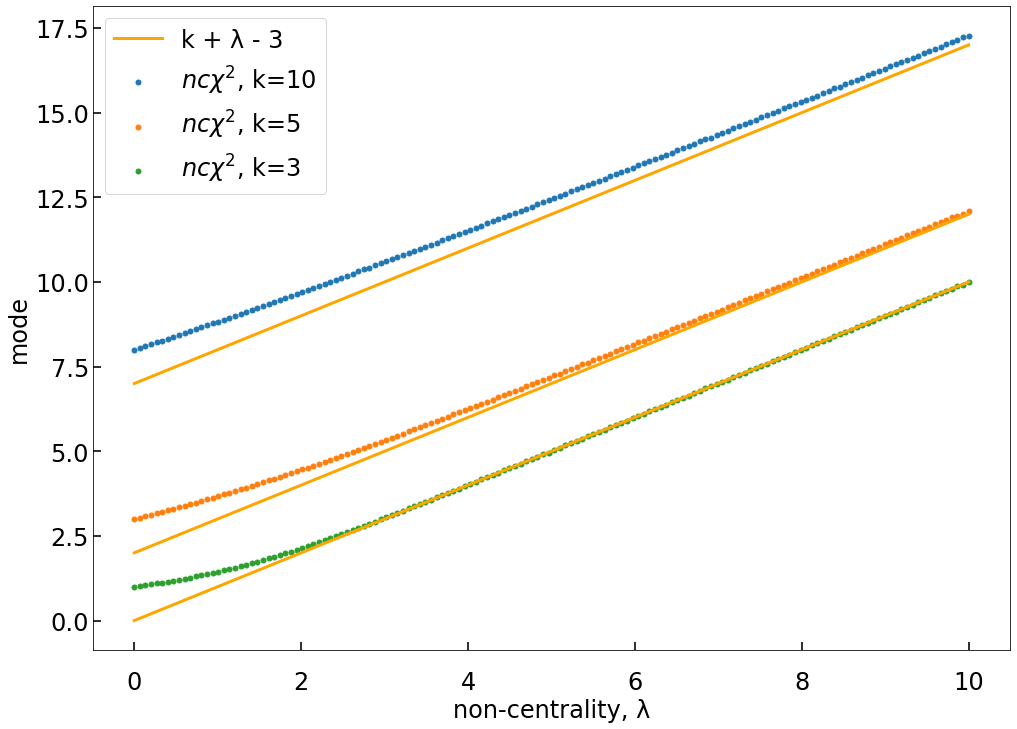

In [10]:
plt.scatter(λs*2, ncmax(10., λs*2), label="$nc\chi^2$, k=10")
plt.plot(λs*2, mymax(10., λs*2), color="orange")
plt.scatter(λs*2, ncmax(5., λs*2), label="$nc\chi^2$, k=5")
plt.plot(λs*2, mymax(5., λs*2), color="orange")
plt.scatter(λs*2, ncmax(3., λs*2), label="$nc\chi^2$, k=3")
plt.plot(λs*2, mymax(3., λs*2), color="orange", label="k + λ - 3")
plt.ylabel("mode")
plt.xlabel("non-centrality, λ")
plt.legend()

plt.savefig("plots/ncx2-vs-approx.eps", dpi=300/2.4/2)

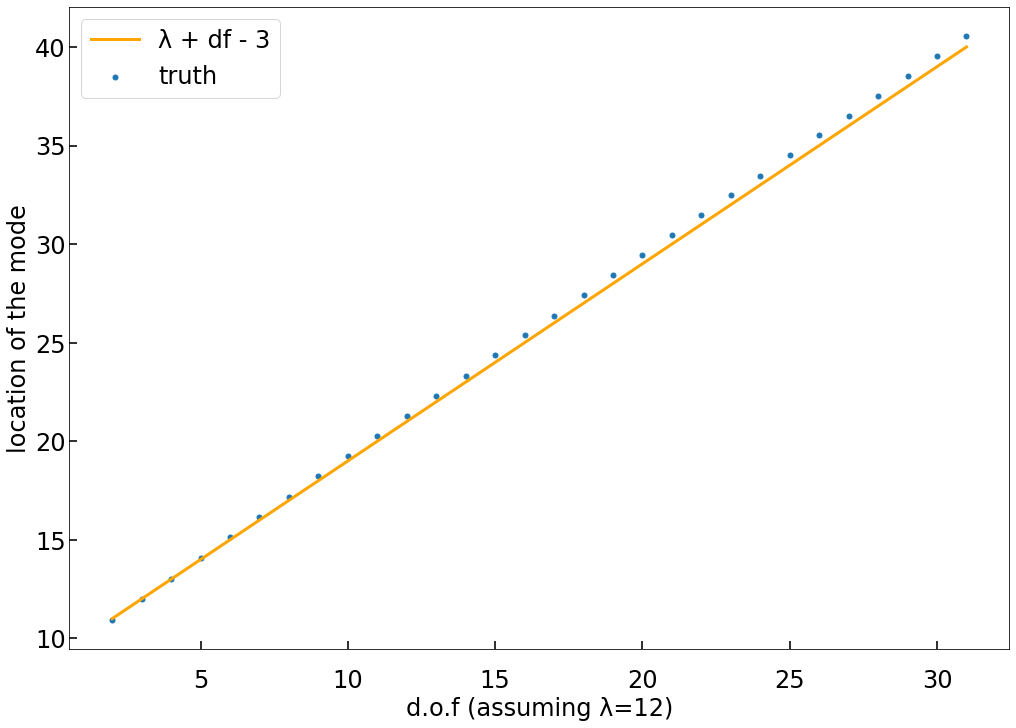

In [11]:
plt.scatter(dfs, ncmax(dfs, 12), label="truth")
plt.plot(dfs, mymax(dfs, 12), color="orange", label="λ + df - 3")
plt.ylabel("location of the mode")
plt.xlabel("d.o.f (assuming λ=12)")
plt.legend()

From the second plot follows that our approximation doesn't work for large d.o.f. It turns out that it is valid for $\lambda >> d.o.f$. Also, we plot for d.o.f > 2 because otherwise non-central chi2 diverges at 0. (see below)

## Derivation

###  Master equation

PDF of non-central $\chi^2$ with $k$ d.o.f and $\lambda$ as a non-centrality parameter:

$$
\begin{align}
    \chi^2_{k, \lambda}(x) = \frac{1}{2} \mathrm{e}^{-\frac{x+\lambda}{2}} \left(\frac{x}{\lambda}\right)^{\frac{k-2}{4}} I_{\frac{k-2}{2}} (\sqrt{\lambda x})
\end{align}
$$

Or in a little bit restructured form:

$$
\begin{align}
    \chi^2_{k, \lambda}(x) = \frac{1}{2 \lambda^{\frac{k - 2}{2}}} \mathrm{e}^{-\frac{x+\lambda}{2}} \left(\sqrt{\lambda x}\right)^{\frac{k-2}{2}} I_{\frac{k-2}{2}} (\sqrt{\lambda x})
\end{align}
$$

We require the derivative of the PDF of the non-central $\chi^2$ to be 0. This will provide us with an implicit dependency of the mode on parameters `d.o.f` and `λ`

For derivative of the modified Bessel function we will use the following recurrent relation:

$$\frac{d}{dz} \left(z^{\nu} I_{\nu}(z)\right) = z^\nu I_{\nu-1}(z)$$

or in the expanded form:

$$ \nu I_{\nu}(z) + z \frac{d}{dz} I_{\nu}(z) = z I_{\nu-1}(z)$$

see https://dlmf.nist.gov/10.29

$$
\begin{align}
    0 = \frac{d}{dx} \chi^2_{k, \lambda}(x) = & \frac{1}{2 \lambda^{\frac{k - 2}{2}}} (-\frac{1}{2}) \mathrm{e}^{-\frac{x+\lambda}{2}} \left(\sqrt{\lambda x}\right)^{\frac{k-2}{2}} I_{\frac{k-2}{2}} (\sqrt{\lambda x}) 
    + \frac{1}{2 \lambda^{\frac{k - 2}{2}}} \mathrm{e}^{-\frac{x+\lambda}{2}} \frac{d}{dx}\left[ \left(\sqrt{\lambda x}\right)^{\frac{k-2}{2}} I_{\frac{k-2}{2}} (\sqrt{\lambda x})\right] \\
    = & \frac{1}{2 \lambda^{\frac{k - 2}{2}}} (-\frac{1}{2}) \mathrm{e}^{-\frac{x+\lambda}{2}} \left(\sqrt{\lambda x}\right)^{\frac{k-2}{2}} I_{\frac{k-2}{2}} (\sqrt{\lambda x}) 
    + \frac{1}{2 \lambda^{\frac{k - 2}{2}}} \mathrm{e}^{-\frac{x+\lambda}{2}}  \left(\sqrt{\lambda x}\right)^{\frac{k-2}{2}} I_{\frac{k-2}{2} - 1}(\sqrt{\lambda x}) \frac{1}{2}\sqrt{\frac{\lambda}{x}} \\
    = & \frac{1}{2} \chi^2_{d, \lambda}(x) \cdot \left[ -1 +  \sqrt{\frac{\lambda}{x}}\frac{I_{\frac{k-2}{2} - 1}(\sqrt{\lambda x})}{I_{\frac{k-2}{2}}(\sqrt{\lambda x})} \right] = 0
\end{align}
$$

Assuming PDF itself is non-zero, we end up with the following simple equation:

$$ \bbox[2pt, border: 1px solid black]{x I_{\frac{k-2}{2}}(\sqrt{\lambda x}) = \sqrt{\lambda x} I_{\frac{k-2}{2} - 1}(\sqrt{\lambda x})} $$

###  Derivative form of the master equation

We want to reduce the equation above to the form which doesn't mix Bessel functions of different degree. As a tradeoff we have to include derivatives of the Bessel function. Let's use recurrent relation for the derivative of the Bessel function in the expanded form to achieve this micro-goal.

$$
x I_{\frac{k-2}{2}}(\sqrt{\lambda x}) = \frac{k-2}{2} I_{\frac{k-2}{2}}(\sqrt{\lambda x}) + \sqrt{\lambda x} I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x})
$$

where $I^{\prime}_{\nu}(t) = \frac{d}{dt} I_{\nu}(t)$

After grouping similar terms:

$$
\bbox[2pt, border: 1px solid black]{%
\sqrt{\lambda x} I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) = (x - \frac{k-2}{2}) I_{\frac{k-2}{2}}(\sqrt{\lambda x})
}
$$

### Get rid of Bessel functions. Differential equation for the mode

Equation-definition of the modified Bessel's function:

$$ t^2 \frac{d^2}{dt^2} I_{\nu}(t) + t \frac{d}{dt} I_{\nu}(t) - (t^2 + \nu^2) I_{d, \lambda}(t) = 0 $$

We already can get rid of the first derivative term by using master equation in the derivative form. To get rid of the second derivative term, let's differentiate the master equation in derivative form by parameter $\lambda$. However, we should remember that $x = x(\lambda)$, thus $x^\prime = \frac{d}{d\lambda}x(\lambda)$:

$$
\begin{align}
0 = &\frac{d}{d\lambda} \left[ \sqrt{\lambda x} I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) - (x - \frac{k-2}{2}) I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \right] \\
= &(\sqrt{\lambda x})^{\prime} I^{\prime}_{\frac{k-2}{2}} (\sqrt{\lambda x}) + \sqrt{\lambda x} I^{\prime \prime}_{\frac{k-2}{2}} (\sqrt{\lambda x}) (\sqrt{\lambda x})^{\prime} - (x - \frac{k-2}{2}) I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) (\sqrt{\lambda x})^{\prime} - x^{\prime} I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \\
= &(\sqrt{\lambda x})^{\prime} \left[\sqrt{\lambda x} I^{\prime \prime}_{\frac{k-2}{2}} (\sqrt{\lambda x}) - (x - \frac{k-2}{2} - 1) I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) - \frac{x^{\prime}}{(\sqrt{\lambda x})^\prime} I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \right] = 0
\end{align}
$$

$$
\bbox[2pt, border: 1px solid black]{%
\sqrt{\lambda x} I^{\prime \prime}_{\frac{k-2}{2}} (\sqrt{\lambda x}) = (x - \frac{k-2}{2} - 1) I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) + 2 \sqrt{\lambda x} \frac{x^{\prime}}{x + \lambda x^\prime} I_{\frac{k-2}{2}}(\sqrt{\lambda x})
}
$$

Thus, we've got a pretty formula that involves the second derivative of the Bessel function. Now let's substitute it into the Bessel's equation:

$$
\begin{align}
0 = &\sqrt{\lambda x}^2 I^{\prime \prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) + \sqrt{\lambda x} I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) - (\lambda x + (\frac{k-2}{2})^2) I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \\
= & \sqrt{\lambda x}(x - \frac{k-2}{2} - 1) I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) + \frac{2 \lambda xx^{\prime}}{x + \lambda x^\prime} I_{\frac{k-2}{2}}(\sqrt{\lambda x}) + \sqrt{\lambda x} I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) - (\lambda x + (\frac{k-2}{2})^2) I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \\
= & \sqrt{\lambda x}(x - \frac{k-2}{2}) I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) - (\lambda x + (\frac{k-2}{2})^2 - \frac{2 \lambda xx^{\prime}}{x + \lambda x^\prime}) I_{\frac{k-2}{2}}(\sqrt{\lambda x}) = 0
\end{align}
$$

Then let's substitute the first derivative:

$$
\begin{align}
0 = &\sqrt{\lambda x}(x - \frac{k-2}{2}) I^{\prime}_{\frac{k-2}{2}}(\sqrt{\lambda x}) - (\lambda x + (\frac{k-2}{2})^2 - \frac{2 \lambda xx^{\prime}}{x + \lambda x^\prime}) I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \\
= &(x - \frac{k-2}{2})^2 I_{\frac{k-2}{2}}(\sqrt{\lambda x}) - (\lambda x + (\frac{k-2}{2})^2 - \frac{2 \lambda xx^{\prime}}{x + \lambda x^\prime}) I_{\frac{k-2}{2}}(\sqrt{\lambda x}) \\
= & x \left[ x - (k-2+\lambda) + \frac{2 \lambda x^{\prime}}{x + \lambda x^\prime}\right]I_{\frac{k-2}{2}}(\sqrt{\lambda x}) = 0
\end{align}
$$

Now we can get rid of fractions,and group terms by the derivative order. We've got a differential equation for the mode:

$$
\bbox[2pt, border: 1px solid black]{%
 \lambda x^{\prime} (x - k - \lambda + 4) + x (x - k - \lambda + 2) = 0
}
$$

### Approximate solution

To solve the differential equation for the mode approximately we need a small parameter to conduct the expansion. As we've seen from the plots, linear approximation works well for $\lambda >> k$, so let's introduce a new parameter:

$$ t = \frac{k}{\lambda} << 1$$

Then:

$$  x^\prime = \frac{d}{d \lambda} x(\lambda) = \frac{dt(\lambda)}{d\lambda} \frac{d}{dt} x(t) = -\frac{t^2}{k} \dot{x}$$

Differential equation for mode then looks as follows:

$$
 -t \dot{x} (xt - kt - k + 4t) + x (xt - kt - k + 2t) = 0
$$

Now, we should remember that our goal is to discovere linear dependency. In the current scenario it is not simple, because approximation is built according $x \approx C_0 + C_1 t + ... \approx C_0 + C_1 \frac{k}{\lambda} + ...$. Thus we get an expansion over fractions $\frac{k}{\lambda}$ and there is no simple way to retrieve: $x \approx \lambda + k$. To overcome this let's introduce:

$$y(t) = t x(t)$$

, then $x(t) \approx C_0 \frac{\lambda}{k} + C_1 + C_2 \frac{k}{\lambda} + ...$

$$
 -(y' t - y) (y - kt - k + 4t) + y (y - kt - k + 2t) = 0
$$

**0-approximation**: $y = C_0$

$$
C_0 (C_0 - k) + C_0 (C_0 - k) = 0
$$

We see that there is a non-trivial solution for $C_0$: $C_0 = k$. Thus $y = t x = \frac{k}{\lambda} x = k$, and:

$$ x = \lambda $$

**1-approximation**: $y = k + C_1 t$

$$
 2 k (C_1 - k + 3) t = 0
$$

thus $C_1 = k - 3$, $y = \frac{k}{\lambda} x = k + (k-3) \frac{k}{\lambda}$

$$ x = \lambda + k - 3 $$

**2-approximation**: $y = k + (k-3) t + C_2 t^2$

$$
 (3 - k + 2 k C_2) t^2 = 0
$$

thus $C_2 = \frac{k - 3}{2 k}$, $y = \frac{k}{\lambda} x = k + (k-3) \frac{k}{\lambda} + \frac{k-3}{2 k} (\frac{k}{\lambda})^2$

$$ x = \lambda + k - 3 + \frac{1}{2} (\frac{k}{\lambda} - \frac{3}{\lambda}) \frac{k}{\lambda} $$

2-nd order correction is useful to estimate the error of the linear approximation. We see that with growing $\lambda$, while the scale parameter $\frac{k}{\lambda}$ preserved fixed, the error decreases and does not depend on the number of d.o.f ($k$).

## Small number of d.o.f

### $k < 2$

It turns out that mode of the non-central chi-squared distribution does not exist for small number of d.o.f. It is easy to see from the assymptotic behavior of its PDF near 0:

[DLMF (§10.30)](https://dlmf.nist.gov/10.30#i)
$$
    I_{\nu} \rightarrow \left(\frac{z}{2}\right)^{\nu} \frac{1}{\Gamma(\nu + 1)},\quad z \rightarrow 0
$$

In case of the non-central $\chi^2$ PDF we get the following limiting form:

$$
\begin{align}
    \chi^2_{k, \lambda}(x) = \frac{1}{2\Gamma(\frac{k}{2})} \frac{1}{(2 \lambda)^{\frac{k - 2}{2}}} \mathrm{e}^{-\frac{\lambda}{2}} \left(\sqrt{\lambda x}\right)^{k-2}
\end{align}
$$

We see that for $k < 2$ the value of the PDF diverges at $0$, thus the mode does not exist

### $k \geq 2$

For $k = 2$ the value of the PDF at $0$ turns out to be finite. If derivative is positive at zero, then although the value is finite, it is definitely not a maximum. Derivative of the non-central chi-squared for $k = 2$ looks as follows:

$$
\frac{d}{dx} \chi^2_{k, \lambda}(x) = \frac{1}{2} \chi^2_{d, \lambda}(x) \cdot \left[ -1 +  \sqrt{\frac{\lambda}{x}}\frac{I_{-1}(\sqrt{\lambda x})}{I_{0}(\sqrt{\lambda x})} \right]
$$

By combining the symmetricity of the modified Bessel function [DLMF §10.27](https://dlmf.nist.gov/10.27) and the assymptotic behavior of $I_{\nu}$ near $0$ we simplify the expression above:

$$
\frac{d}{dx} \chi^2_{k, \lambda}(x) = \frac{1}{2} \chi^2_{d, \lambda}(x) \cdot \left[ -1 +  \sqrt{\frac{\lambda}{x}} \frac{\left(\frac{\sqrt{\lambda x}}{2}\right)^1 \frac{1}{\Gamma(2)}}{\left(\frac{\sqrt{\lambda x}}{2}\right)^0 \frac{1}{\Gamma(1)}} \right] = \frac{1}{2} \chi^2_{d, \lambda}(x) \left[ -1  + \sqrt{\frac{\lambda}{x}} \frac{\sqrt{\lambda x}}{2} \right] = \frac{1}{2} \chi^2_{d, \lambda}(x) \left[ -1 + \frac{\lambda}{2} \right]
$$

Taking into account that PDF is always positive, we see that for $\lambda > 2$ point $x = 0$ is not a maximum anymore.

For $k = 2$ at $\lambda = 2$ our scale parameter $\frac{k}{\lambda} = 1$, thus in the range where our approximation is precise ($\frac{k}{\lambda} << 1$) point $x = 0$ is never a maximum.